# Boosting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [2]:
data = pd.read_csv('../Datasets/bank_deposit.csv')
data.head(5)

,idcliente,duration,previous,housing,campaign,loan,default,target,muestra
0,1,261,0,1,1,0,0,0,1
1,2,50,0,1,1,0,0,0,1
2,3,1492,0,1,1,0,0,0,1
3,4,104,0,1,1,0,0,0,1
4,5,13,0,1,1,0,0,0,1


In [3]:
data.dtypes

idcliente    int64
duration     int64
previous     int64
housing      int64
campaign     int64
loan         int64
default      int64
target       int64
muestra      int64
dtype: object

In [4]:
data['housing'] = data['housing'].astype(object)
data['loan'] = data['loan'].astype(object)
data['default'] = data['default'].astype(object)

In [6]:
data['c_housing'] = LabelEncoder().fit_transform(data.housing.values)
data['c_loan'] = LabelEncoder().fit_transform(data.loan.values)
data['c_default'] = LabelEncoder().fit_transform(data.default.values)

In [7]:
data.head(5)

,idcliente,duration,previous,housing,campaign,loan,default,target,muestra,c_housing,c_loan,c_default
0,1,261,0,1,1,0,0,0,1,1,0,0
1,2,50,0,1,1,0,0,0,1,1,0,0
2,3,1492,0,1,1,0,0,0,1,1,0,0
3,4,104,0,1,1,0,0,0,1,1,0,0
4,5,13,0,1,1,0,0,0,1,1,0,0


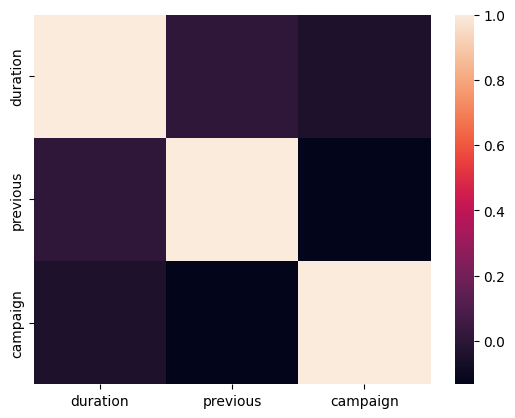

In [8]:
sns.heatmap(data.loc[:,['duration','previous','campaign']].corr(method = "spearman"))
plt.show()

Prueba de Correlación
* Ho: no existe correlación entre las variables
* Ha: existe correlación entre las variables

In [9]:
data.loc[:,['duration','previous','campaign']].corr(method = "spearman")

,duration,previous,campaign
duration,1.000000,0.007392,-0.045111
previous,0.007392,1.000000,-0.133380
campaign,-0.045111,-0.133380,1.000000


In [10]:
data.target.value_counts()

target
0    5289
1    5289
Name: count, dtype: int64

In [11]:
100*data['target'].value_counts(normalize=True)

target
0    50.0
1    50.0
Name: proportion, dtype: float64

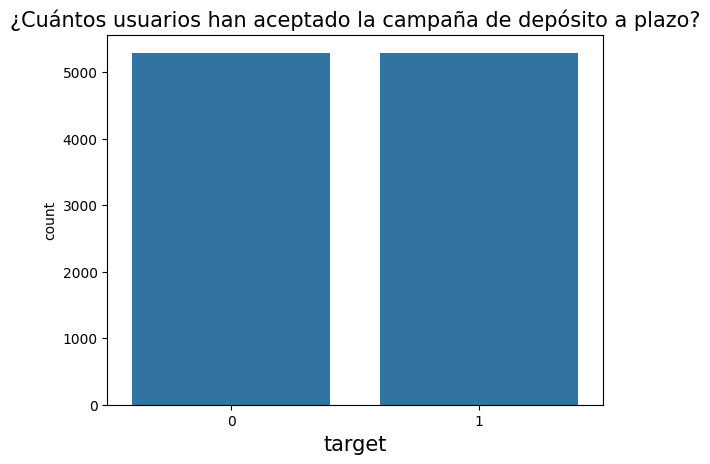

In [12]:
sns.countplot(data = data, x = 'target')
plt.xlabel('target', fontsize = 15)
plt.title('¿Cuántos usuarios han aceptado la campaña de depósito a plazo?', fontsize = 15)
plt.show()

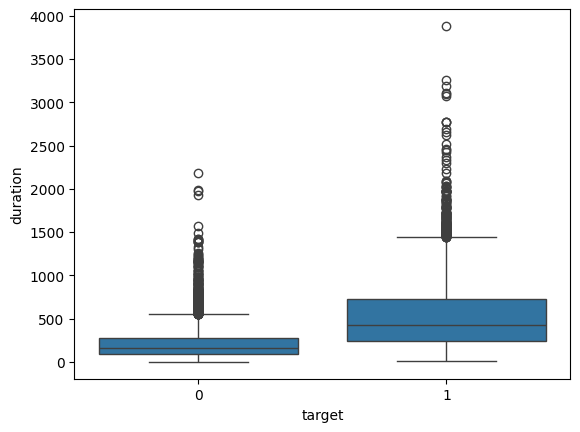

In [13]:
sns.boxplot(x='target',y='duration',data=data)
plt.show()

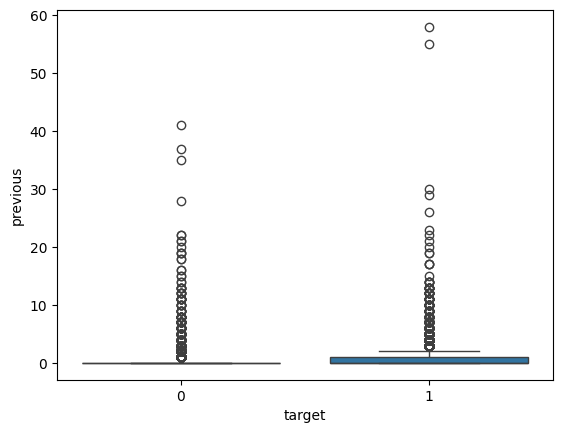

In [14]:
sns.boxplot(x='target',y='previous',data=data)
plt.show()

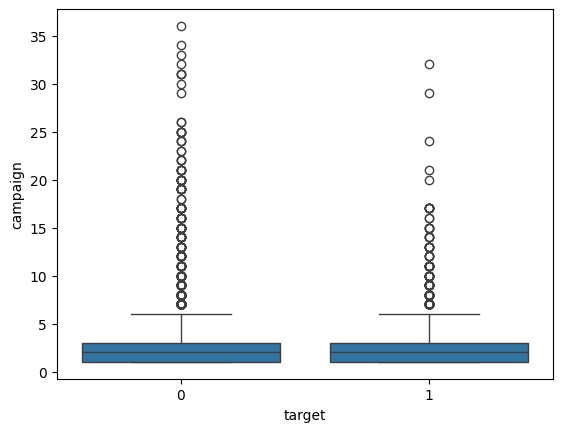

In [15]:
sns.boxplot(x='target',y='campaign',data=data)
plt.show()

housing     0     1
target             
0        2176  3113
1        3354  1935


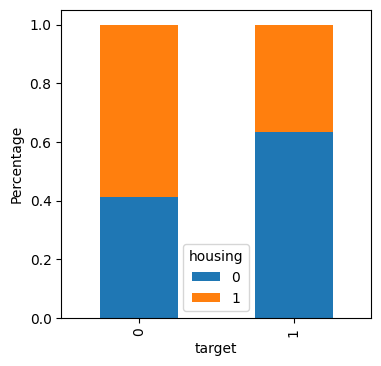

In [16]:
print(pd.crosstab(data["target"],data["housing"]))
t = pd.crosstab(data["target"],data["housing"])
t.div(t.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("target")
plt.ylabel("Percentage")
plt.show()

loan       0    1
target           
0       4359  930
1       4805  484


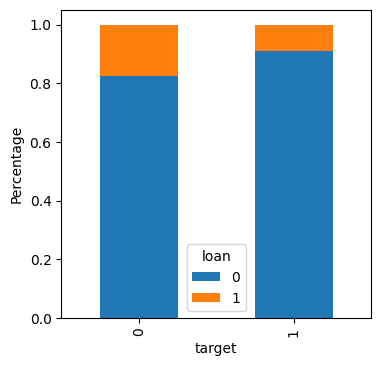

In [17]:
print(pd.crosstab(data["target"],data["loan"]))
t = pd.crosstab(data["target"],data["loan"])
t.div(t.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("target")
plt.ylabel("Percentage")
plt.show()

default     0   1
target           
0        5202  87
1        5237  52


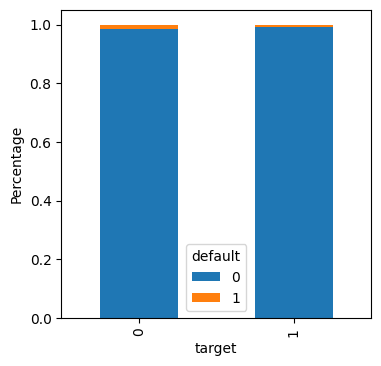

In [18]:
print(pd.crosstab(data["target"],data["default"]))
t = pd.crosstab(data["target"],data["default"])
t.div(t.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("target")
plt.ylabel("Percentage")
plt.show()

In [19]:
X = data[['c_housing','c_loan','c_default','duration','previous','campaign']]
y = data['target']

In [20]:
X = X.to_numpy()
X[0:5]

array([[   1,    0,    0,  261,    0,    1],
       [   1,    0,    0,   50,    0,    1],
       [   1,    0,    0, 1492,    0,    1],
       [   1,    0,    0,  104,    0,    1],
       [   1,    0,    0,   13,    0,    1]], dtype=int64)

In [21]:
y = y.to_numpy()
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [23]:
transformer = StandardScaler()
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [24]:
cv_scores = cross_val_score(GradientBoostingClassifier(),X_train,y_train,cv=5)
cv_scores

array([0.79444773, 0.80921441, 0.79787234, 0.81205674, 0.78132388])

In [25]:
print("cv_scores mean:{}".format(np.mean(cv_scores)))
print("cv_scores std:{}".format(np.std(cv_scores)))

cv_scores mean:0.7989830186597853
cv_scores std:0.011038580616948433


Tuning
* n_estimators: Número de árboles
* max_features: Cantidad de variables a considerar al buscar el mejor split
* max_depth: Profundidad del árbol

In [26]:
param_grid = {
    'n_estimators': [200, 700],
    'max_features': [1.0, 'sqrt', 'log2'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}
grid = GridSearchCV(GradientBoostingClassifier(),param_grid,refit=True,verbose=2,cv=5)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[CV] END ....max_depth=2, max_features=1.0, n_estimators=200; total time=   4.5s
[CV] END ....max_depth=2, max_features=1.0, n_estimators=200; total time=   3.0s
[CV] END ....max_depth=2, max_features=1.0, n_estimators=200; total time=   3.7s
[CV] END ....max_depth=2, max_features=1.0, n_estimators=200; total time=   3.4s
[CV] END ....max_depth=2, max_features=1.0, n_estimators=200; total time=   4.8s
[CV] END ....max_depth=2, max_features=1.0, n_estimators=700; total time=  13.8s
[CV] END ....max_depth=2, max_features=1.0, n_estimators=700; total time=  14.7s
[CV] END ....max_depth=2, max_features=1.0, n_estimators=700; total time=  16.1s
[CV] END ....max_depth=2, max_features=1.0, n_estimators=700; total time=  18.0s
[CV] END ....max_depth=2, max_features=1.0, n_estimators=700; total time=  16.6s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=200; total time=   3.3s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=200; total time=   4.0s
[CV] END ...max_depth=2, max

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [1.0, 'sqrt', 'log2'],
                         'n_estimators': [200, 700]},
             verbose=2)

In [27]:
grid.best_params_

{'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 200}

In [28]:
classifier = GradientBoostingClassifier(max_depth=2, max_features='log2', n_estimators=700).fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [29]:
feature_scores = pd.Series(classifier.feature_importances_, index=['housing','loan','default','duration','previous','campaign']).sort_values(ascending=False)
feature_scores

duration    0.688544
previous    0.137184
housing     0.112456
campaign    0.035151
loan        0.023780
default     0.002883
dtype: float64

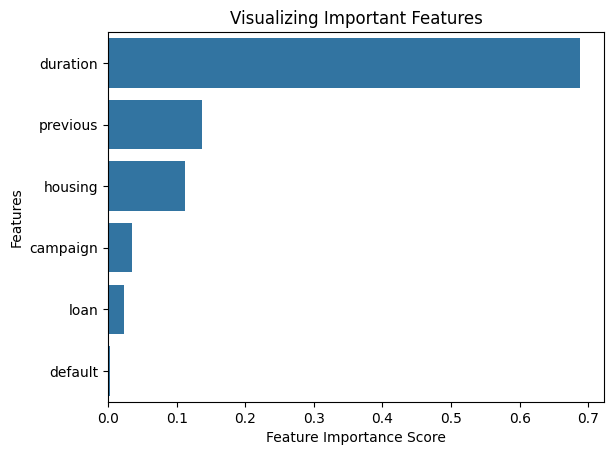

In [30]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

Confusion matrix, without normalization
[[800 229]
 [189 898]]
Normalized confusion matrix
[[0.77745384 0.22254616]
 [0.17387305 0.82612695]]


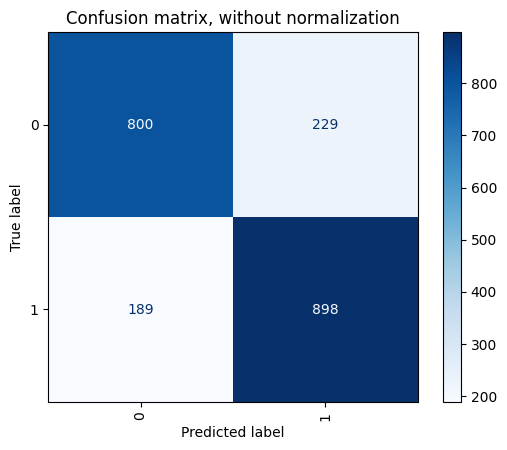

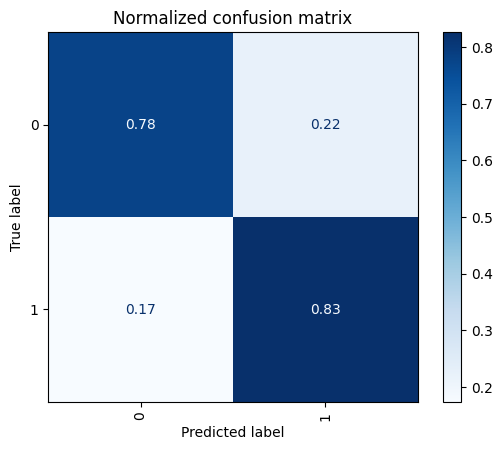

In [31]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
cm = confusion_matrix(y_test, y_pred)

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    if normalize:
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=classifier.classes_)
        disp = disp.plot(cmap=plt.cm.Blues, values_format='.2f', xticks_rotation='vertical')
    else:
        disp = disp.plot(cmap=plt.cm.Blues, values_format='d', xticks_rotation='vertical')

    disp.ax_.set_title(title)

    print(title)
    print(cm if not normalize else cm_normalized)

plt.show()

In [32]:
y_pred_prob = classifier.predict_proba(X_test)
y_pred_prob[0:5]

array([[0.06763341, 0.93236659],
       [0.17716975, 0.82283025],
       [0.72227559, 0.27772441],
       [0.07643045, 0.92356955],
       [0.24118162, 0.75881838]])

In [33]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.876120562563309

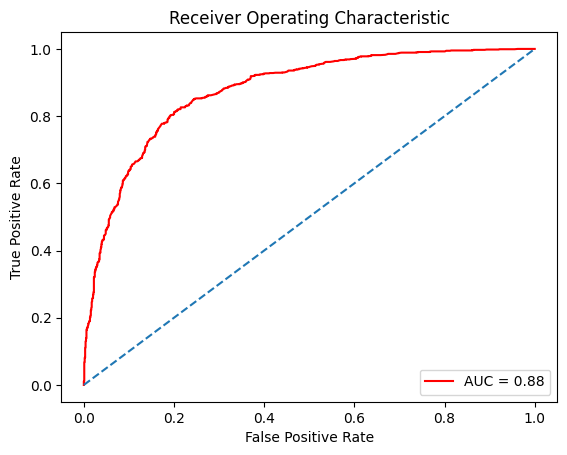

In [34]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1029
           1       0.80      0.83      0.81      1087

    accuracy                           0.80      2116
   macro avg       0.80      0.80      0.80      2116
weighted avg       0.80      0.80      0.80      2116



In [38]:
dataf_combined = pd.concat([pd.DataFrame(X_test),pd.DataFrame(y_test),pd.DataFrame(y_pred),pd.DataFrame(y_pred_prob)],axis=1)
dataf_combined.columns = ['c_housing','c_loan','c_default','duration','previous','campaign','Target','Target_Pred','Target_Pred_Prob_0','Target_Pred_Prob_1']
dataf_combined.head(10)

,c_housing,c_loan,c_default,duration,previous,campaign,Target,Target_Pred,Target_Pred_Prob_0,Target_Pred_Prob_1
0,-0.949512,-0.393381,-0.117893,-0.332574,0.062612,-0.564943,1,1,0.067633,0.932367
1,-0.949512,-0.393381,-0.117893,0.624597,-0.365356,-0.564943,1,1,0.177170,0.822830
2,-0.949512,-0.393381,-0.117893,-0.656407,-0.365356,-0.191987,0,0,0.722276,0.277724
3,-0.949512,-0.393381,-0.117893,1.541647,-0.365356,-0.564943,1,1,0.076430,0.923570
4,1.053173,-0.393381,-0.117893,0.071501,0.918548,-0.564943,1,1,0.241182,0.758818
5,1.053173,-0.393381,-0.117893,-1.014630,-0.365356,-0.564943,0,0,0.982302,0.017698
6,1.053173,-0.393381,-0.117893,1.607560,0.918548,-0.564943,1,1,0.044301,0.955699
7,-0.949512,-0.393381,-0.117893,-0.905730,-0.365356,-0.191987,0,0,0.892929,0.107071
8,-0.949512,-0.393381,-0.117893,0.590208,-0.365356,-0.191987,0,1,0.212136,0.787864
9,-0.949512,-0.393381,-0.117893,-0.478729,-0.365356,-0.564943,1,1,0.311701,0.688299


In [39]:
df_original_features = pd.DataFrame(X_test, columns=['c_housing','c_loan','c_default','duration','previous','campaign'])
df_original = pd.DataFrame(transformer.inverse_transform(df_original_features), columns=['c_housing','c_loan','c_default','duration','previous','campaign'])

df_original[['Target','Target_Pred','Target_Pred_Prob_0','Target_Pred_Prob_1']] = dataf_combined[['Target','Target_Pred','Target_Pred_Prob_0','Target_Pred_Prob_1']]
df_original.head(10)

,c_housing,c_loan,c_default,duration,previous,campaign,Target,Target_Pred,Target_Pred_Prob_0,Target_Pred_Prob_1
0,0.0,0.0,0.0,263.0,1.0,1.0,1,1,0.067633,0.932367
1,0.0,0.0,0.0,597.0,0.0,1.0,1,1,0.177170,0.822830
2,0.0,0.0,0.0,150.0,0.0,2.0,0,0,0.722276,0.277724
3,0.0,0.0,0.0,917.0,0.0,1.0,1,1,0.076430,0.923570
4,1.0,0.0,0.0,404.0,3.0,1.0,1,1,0.241182,0.758818
5,1.0,0.0,0.0,25.0,0.0,1.0,0,0,0.982302,0.017698
6,1.0,0.0,0.0,940.0,3.0,1.0,1,1,0.044301,0.955699
7,0.0,0.0,0.0,63.0,0.0,2.0,0,0,0.892929,0.107071
8,0.0,0.0,0.0,585.0,0.0,2.0,0,1,0.212136,0.787864
9,0.0,0.0,0.0,212.0,0.0,1.0,1,1,0.311701,0.688299


In [41]:
quantiles = df_original['Target_Pred_Prob_1'].quantile(q=[0.20,0.40,0.60,0.80])
quantiles

0.2    0.115531
0.4    0.370864
0.6    0.680315
0.8    0.866808
Name: Target_Pred_Prob_1, dtype: float64

In [42]:
def asignar_categoria(valor):
    if valor <= quantiles.iloc[0]:
        return 'Muy bajo'
    elif valor <= quantiles.iloc[1]:
        return 'Bajo'
    elif valor <= quantiles.iloc[2]:
        return 'Medio'
    elif valor <= quantiles.iloc[3]:
        return 'Alto'
    else:
        return 'Muy alto'

df_original['score'] = df_original['Target_Pred_Prob_1'].apply(asignar_categoria)
df_original

,c_housing,c_loan,c_default,duration,previous,campaign,Target,Target_Pred,Target_Pred_Prob_0,Target_Pred_Prob_1,score
0,0.0,0.0,0.0,263.0,1.0,1.0,1,1,0.067633,0.932367,Muy alto
1,0.0,0.0,0.0,597.0,0.0,1.0,1,1,0.177170,0.822830,Alto
2,0.0,0.0,0.0,150.0,0.0,2.0,0,0,0.722276,0.277724,Bajo
3,0.0,0.0,0.0,917.0,0.0,1.0,1,1,0.076430,0.923570,Muy alto
4,1.0,0.0,0.0,404.0,3.0,1.0,1,1,0.241182,0.758818,Alto
...,...,...,...,...,...,...,...,...,...,...,...
2111,1.0,0.0,0.0,144.0,0.0,5.0,0,0,0.959324,0.040676,Muy bajo
2112,1.0,0.0,0.0,56.0,0.0,3.0,0,0,0.995866,0.004134,Muy bajo
2113,0.0,0.0,0.0,327.0,0.0,1.0,1,1,0.268961,0.731039,Alto
2114,1.0,0.0,0.0,821.0,0.0,2.0,1,1,0.205092,0.794908,Alto
